# 11. Transposable elements
# 11.1 Example pipeline

In [ ]:
This was also repeated for MareHarA, MfloSJF1, MincW1

codes = code_sequence_ids('meloidogyne_assemblies/Ent_gapClosed.fa',
                          'TEs/Ent_gapClosed.codes',
                          'TEs/Ent_gapClosed.fa.coded',
                          'Ment')

run_repeat_masker('TEs/Ent_gapClosed.fa.coded', lib = 'TEs/Nematoda.lib')

!mkdir TEs/MentL30
!mv TEs/Ent_gapClosed.fa.coded.out TEs/MentL30/Ent_gapClosed.fa.coded.out

run_OneCodeToFindThemAll('TEs/MentL30/',
                         'TEs/MentL30/Ent_gapClosed.octfta.int', 
                         'TEs/MentL30/Ent_gapClosed.octfta.out', 
                         'TEs/Ent_gapClosed.fa.coded'
                          )

run_LTRharvest('TEs/Ent_gapClosed.fa.coded', 
               'TEs/MentL30/ltrharvest.int', 
               'TEs/MentL30/ltrharvest.out') 

run_TransposonPSI('TEs/Ent_gapClosed.fa.coded')

TEs, serial = parse_ocfa_elem_stored('TEs/MentL30/')

TEs, serial = integrate_ltrharvest_to_RM_TEs('TEs/MentL30/ltrharvest.out',
                                             'TEs/Ent_gapClosed.fa.coded', 
                                             TEs, 
                                             serial) 

TEs = integrate_TransposonPSI_to_RM_TEs('Ent_gapClosed.fa.coded.TPSI.allHits.chains.bestPerLocus', 
                                        'TEs/Ent_gapClosed.fa.coded', 
                                        TEs, 
                                        serial)

write_gff(TEs, 'MentL30.gff3.coded')

import pickle
with open('TEs/MentL30.pkl','wb') as pkl:
    pickle.dump(TEs, pkl)

# 11.2 Extract data from Szitenberg et al 2016

In [ ]:
import gzip, pickle

with gzip.open('TEs/TEs.pkl.gz','rb') as pkl:
    TEs_from_paper = pickle.load(pkl)

with open('TEs/MfloJB5.pkl','wb') as pkl:
    pickle.dump(TEs_from_paper['Mflo'], pkl)

with open('TEs/Mchi.pkl','wb') as pkl:
    pickle.dump(TEs_from_paper['Mchi'], pkl)

with open('TEs/Mhap.pkl','wb') as pkl:
    pickle.dump(TEs_from_paper['Mhap'], pkl)

In [1]:
import cPickle as pickle
All_SP_TEs = {}

samples = ['MentL30','MfloJB5','Mchi','Mhap','MfloSJ1','MareHarA', 'MincW1']

for smpl in samples:
    All_SP_TEs[smpl] = pickle.load(open('TEs/%s.pkl'%smpl,'rb'))

# 11.3 correct family names

In [2]:
corrections = {  'Crypton': 'YR/Crypton',
                 'DNA/Crypton': 'YR/Crypton',
                 'DDE_1': 'DNA/Unclassified',
                 'DNA': 'DNA/Unclassified',
                 'DNA/CMC-Chapaev': 'DNA/Chapaev',
                 'DNA/CMC-EnSpm': 'DNA/EnSpm',
                 'DNA/CMC-Transib':'DNA/Transib',
                 'DNA/EnSpm/CACTA': 'DNA/EnSpm',
                 'DNA/MULE-MuDR': 'DNA/MuLE-MuDR',
                 'DNA/MuDR': 'DNA/MuLE-MuDR',
                 'DNA/RC': 'DNA/Helitron',
                 'DNA/Mariner': 'DNA/TcMar-Mariner',
                 'ISC1316': 'DNA/ISC1316',
                 'ISa': 'DNA/ISa',
                 'ISb': 'DNA/ISb',
                 'LINE': 'LINE/Unclassified',
                 'SINE': 'SINE/Unclassified',
                 'LTR': 'LTR/Unclassified',
                 'LTR/Ngaro': 'YR/Ngaro',
                 'LTR/Viper': 'YR/Viper',
                 'LTR/DIRS': 'YR/DIRS',
                 'MuDR_A_B': 'DNA/MuLE-MuDR',
                 'P_element': 'DNA/P_element',
                 'TY1_Copia':'LTR/Copia',
                 'cacta': 'DNA/EnSpm',
                 'gypsy': 'LTR/Gypsy',
                 'hAT': 'DNA/hAT',
                 'helitronORF': 'DNA/Helitron',
                 'ltr_Roo': 'LTR/Roo',
                 'mariner': 'DNA/TcMar-Mariner',
                 'mariner_ant1': 'DNA/TcMar-Ant1',
                 'piggybac': 'DNA/PiggyBac',
                 'piggyBac': 'DNA/PiggyBac',
                 'DNA/piggyBac': 'DNA/PiggyBac',
                 'DNA/MULE-NOF': 'DNA/MuLE-NOF'}

for sp in All_SP_TEs:
    for e in All_SP_TEs[sp]['taken']:
        if All_SP_TEs[sp]['taken'][e]['higher_tx_level'] in corrections.keys():
            All_SP_TEs[sp]['taken'][e]['higher_tx_level'] = corrections[All_SP_TEs[sp]['taken'][e]['higher_tx_level']]

In [4]:
import pickle, gzip
with gzip.open('TEs/MelTEs.pkl.gz','wb') as pkl:
    pickle.dump(All_SP_TEs,pkl)

# 11.4 Summarize counts at family level

In [6]:
import pandas as pd

familiy_counts = {}
for code in All_SP_TEs:
    counts = {}
    for i in [All_SP_TEs[code]['taken'][e]['higher_tx_level'] for e in All_SP_TEs[code]['taken'].keys()]:
        if not i in counts.keys():
            counts[i] = 0
        counts[i] += 1
    familiy_counts[code] = counts


# 11.5 Add MjavVW4 from a csv table

In [7]:
familiy_counts['MjavVW4'] = {}

df = pd.read_table('TEs/family_counts_no_wtsi.csv')

for ind, row in df.iterrows():
    if row['Mjav'] > 0:
        familiy_counts['MjavVW4'][row['family']] = row['Mjav']

# 11.6 Reformat the dataframe to narrow format

In [11]:
new_df = pd.DataFrame.from_dict(familiy_counts)
new_df = new_df[(new_df.MjavVW4 > 300) & (new_df.MincW1 > 300)]
new_df = new_df.fillna(0)

new_df.to_csv('TEs/MelTEsFamily.csv')

narrow_df = {'Sample':[],'Family':[], 'Count':[]}

for ind, row in new_df.iterrows():
    for col in new_df:
        narrow_df['Sample'].append(col)
        narrow_df['Family'].append(ind)
        narrow_df['Count'].append(new_df.at[ind,col])

narrow_df = pd.DataFrame.from_dict(narrow_df)

narrow_df

,Count,Family,Sample
0,1292.0,DNA/EnSpm,MareHarA
1,112.0,DNA/EnSpm,Mchi
2,1699.0,DNA/EnSpm,MentL30
3,891.0,DNA/EnSpm,MfloJB5
4,559.0,DNA/EnSpm,MfloSJ1
5,122.0,DNA/EnSpm,Mhap
6,1020.0,DNA/EnSpm,MincW1
7,632.0,DNA/EnSpm,MjavVW4
8,926.0,DNA/Ginger2,MareHarA
9,26.0,DNA/Ginger2,Mchi


# 11.7 Plot the wide dataframe

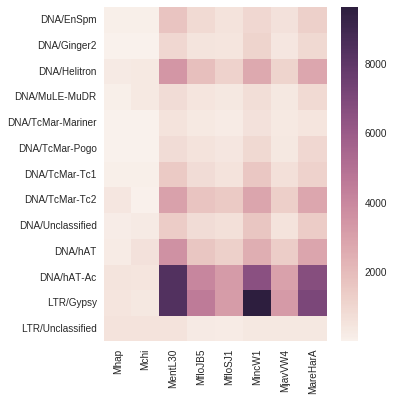

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

new_df = new_df[['Mhap','Mchi','MentL30','MfloJB5','MfloSJ1', 'MincW1','MjavVW4','MareHarA']]

fig, ax = plt.subplots(figsize=(5,6))

sns.heatmap(new_df)#, vmin=1,center=2000)
plt.xticks(rotation=90)
plt.savefig('TEs/heatmap.png')

# 11.8 Plot the narrow dataframe

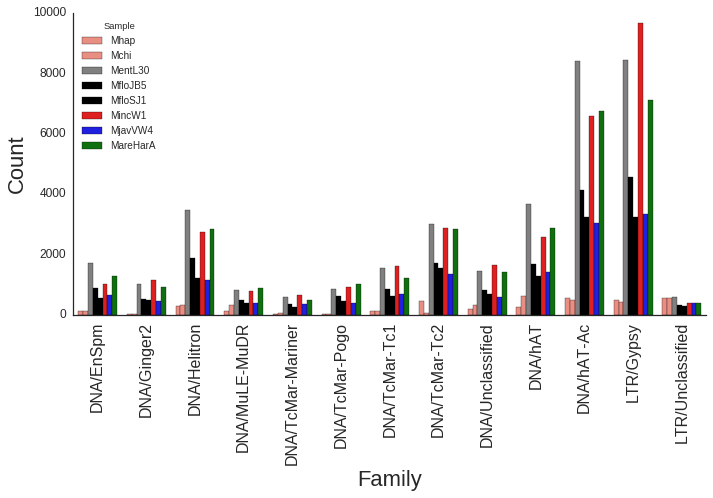

In [51]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,7))

h_order = ['Mhap','Mchi','MentL30','MfloJB5','MfloSJ1','MincW1','MjavVW4','MareHarA']
pal = ['salmon','salmon','gray','black','black','red','blue','green']

g = sns.barplot(x='Family',y='Count', hue='Sample', data=narrow_df, hue_order=h_order, ax=ax, palette=pal)
plt.xticks(rotation=90)
#sns.heatmap(new_df)#, vmin=1,center=2000)
#plt.xticks(rotation=90)
sns.despine(ax=g)
plt.xlabel('Family', fontsize=22)
plt.ylabel('Count', fontsize=22)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.tight_layout()
plt.savefig('TEs/bars.png')

# 11.9 Dependencies

In [ ]:
from Bio.Blast.Applications import NcbitblastnCommandline, NcbipsiblastCommandline
from Bio.Blast import NCBIXML
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqFeature
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.Alphabet import IUPAC
from Bio.Blast import NCBIXML
import re, os, inspect, subprocess, warnings, sys

ReapeatMasker command line function
===================================

In [ ]:
def code_sequence_ids(in_fasta_file_name, codes_log_filename, out_fasta_file_name, genome_code):
      from Bio import SeqIO
      infile = SeqIO.parse(in_fasta_file_name, 'fasta')
      codes = open(codes_log_filename, 'wt')
      contig_ids_coded = {}
      coded_contigs = []
      count = 1
      for record in infile:
          contig_ids_coded[genome_code+'_'+str(count)] = record.id
          record.id = genome_code+'_'+str(count)
          record.description = ''
          count += 1
          coded_contigs.append(record)
      for code in contig_ids_coded.keys():
          codes.write(code + '\\t' + contig_ids_coded[code] + '\\n')
      SeqIO.write(coded_contigs, out_fasta_file_name, 'fasta')
      codes.close()
      return contig_ids_coded

def run_repeat_masker(query, RepeatMasker = '/home/amir/Dropbox/Nematodes/Meloidogyne_hybrids/Homeologue_phylogenomics/TEs/RepeatMasker/RepeatMasker', engine=False, parallel=2,
             slow=False, quick=False, rush=False, nolow=False, noint=False, norna=True, alu=False, div=False,
             lib=False, cutoff=255, is_only=False, is_clip=False, no_is=False, gc=False,
             gccalc=False, frag=60000, nocut=False, alignments=True, inv=False, lcambig=True,
             small=False, xsmall=False, poly=False, source=False, html=False, ace=False, gff=False, u=False,
             xm=False, no_id=True, excln=True, noisy=False):
    
    
    
    frame = inspect.currentframe()
    args, _, _, values = inspect.getargvalues(frame)
    del values['frame']
                    
    # compose the command line 
    
    args_wo_values = ['slow','quick','rush','nolow','noint','norna','alu','is_only','is_clip','no_is'
                      'gccalc','nocut','nocut','alignments','inv','lcambig','small','xsmall','poly',
                      'source','html','ace','gff','u','xm','no_id','excln','noisy']
    
    cline = RepeatMasker + ' '
    for arg in values.keys():
        if not arg in ['RepeatMasker','query']:
            if not arg in args_wo_values and not values[arg] == False:
                cline = cline + '-' + arg + ' ' + str(values[arg]) + ' '
            elif values[arg] == True:
                cline = cline + '-' + arg + ' '

    cline = cline + query
    
    # execute the command
    print cline
    return os.system(cline), query + '.out' 

# One Code To Find Them All

In [ ]:
def run_OneCodeToFindThemAll(pooled_RM_outputs_dir, #The directory containing repeatmasker .out files or a path to a specific .out file
                            ltr_dict_filename, # name of intermediate file
                            output_filename, 
                            genome_assembly,
                            unknown=False,
                            strict=True,
                            build_dictionary = 'TEs/build_dictionary.pl',
                            octfta = 'TEs/one_code_to_find_them_all.pl',
                            ):
    cline = build_dictionary+' --rm '+pooled_RM_outputs_dir+' --unknown > '+ ltr_dict_filename
    os.system(cline)
    
    cline = octfta+' --rm '+pooled_RM_outputs_dir+' --ltr '+ltr_dict_filename+' --fasta '+genome_assembly
    if unknown:
        cline += ' --unknown'
    if strict:
        cline += ' --strict'
    cline +=' > '+output_filename
    os.system(cline)

# LTRharvest

In [ ]:
def run_LTRharvest(input_filename, index_name, output_name):
    cline = 'gt suffixerator -db '+input_filename+' -indexname '+index_name+' -tis -suf -lcp -des -ssp -sds -dna'
    os.system(cline)
    cline = 'gt ltrharvest -index '+index_name+' -mintsd 5 -maxtsd 100 > '+output_name
    os.system(cline)

# TransposonPSI

In [ ]:
def run_TransposonPSI(input_filename,
                  TPSI = 'perl TEs/TransposonPSI_08222010/transposonPSI.pl'):
    cline = (TPSI+' '+input_filename+' nuc')
    os.system(cline)

# Unite OCTFTA with LTRharvest and TransposonPSI

## Parse OCTFTA elem_stored.csv

In [ ]:
def parse_ocfa_elem_stored(pooled_RM_outputs_dir):

    # Get all the '.elem_stored.csv' file names
    from glob import glob
    filenames = glob(pooled_RM_outputs_dir + '*.elem_sorted.csv')

    # An empty dict to hold final TE list
    TEs = {'taken': {}, 'discarded': {}}
    serial = 1

    # Get all the elements in the OCTFTA output
    for filename in filenames:
        taken_elements = {}
        discarded_elements = {}
        for line in open(filename, 'r').readlines():
            if line[:3] == '###':
                
                reference = {'program': 'RMOCFA',
                             'record': line}
                contig = line.split('\t')[4]
                start = line.split('\t')[5]
                end = line.split('\t')[6]
                length = line.split('\t')[7]
                element = line.split('\t')[9]
                family = line.split('\t')[10]
                
                max_score = max([int(i) for i in line.split('\t')[0][3:].split('/')])
                
                take = True
                
                # make sure the locus is not covered and if it is check which match is better
                for element in taken_elements:
                    prex_el_line = taken_elements[element]['ref']['record']
                    prex_el_score = max([int(i) for i in prex_el_line.split('\t')[0][3:].split('/')])
                    prex_el_contig = taken_elements[element]['contig']
                    prex_el_start = taken_elements[element]['start']
                    prex_el_end = taken_elements[element]['end']
                    if (contig == prex_el_contig and 
                        (prex_el_start < start < prex_el_end or
                         prex_el_start < end < prex_el_end or
                         start < prex_el_start < end or
                         start < prex_el_end <end)):
                        if max_score > prex_el_score:
                            discarded_elements[element] = taken_elements.pop(element, None)
                        else:
                            take = False
                        
                if take:
                    taken_elements['element' + str(serial)] = {'ref': reference,
                                                              'contig': contig,
                                                              'start': int(start),
                                                              'end': int(end),
                                                              'length': int(length),
                                                              'lower_tx_level': element,
                                                              'higher_tx_level': family}

                    
                serial += 1
        TEs['taken'].update(taken_elements)
        TEs['discarded'].update(discarded_elements)
    return TEs, serial

## Get loci from the LTRharvest output only if they are longer than ones found with repeatmasker for the same locus

In [ ]:
def integrate_ltrharvest_to_RM_TEs(LTRharvest_output_filename,genome_path, TEs_from_RMOCFA, serial, sim_cutoff=85, l_cutoff=4000 ):
    import re
    from Bio import SeqIO
    
    lines = open(LTRharvest_output_filename, 'r').readlines()
    
    contig_names = [record.id for record in SeqIO.parse(genome_path, 'fasta')]
    
    line_count = 0
    for line in lines:
        if not line[0] == '#' and len(line) > 1:
            # correct contig name:
            ## get the true contig name based on the sequence number in the LTRarvest output:
            from Bio import SeqIO
            corrected_sequence_name = None
            line_serial = int(line.rstrip().split('  ')[-1])
            
            try: 
                corrected_sequence_name = contig_names[line_serial]
            except:
                raise RuntimeError('Could not find contig for seq number ' + str(line_serial))
                
            ## Parse the LTRharvest results line
            reference = {'program': 'LTRharvest',
                         'record': line}
            contig = corrected_sequence_name
            start = int(line.split('  ')[0])
            end = int(line.split('  ')[1])
            length = int(line.split('  ')[2])
            lower_tx_level = '?'
            higher_tx_level = 'LTR'
            sim = float(line.split('  ')[-2])
            l = int(line.split('  ')[2])
            TE = {'ref': reference,
                  'contig': contig,
                  'start': int(start),
                  'end': int(end),
                  'length': int(length),
                  'lower_tx_level': lower_tx_level,
                  'higher_tx_level': higher_tx_level}
            
            ## Check if the locus is already covered by the repeatmasker results
            ## If it is, check if the ltr hit is longer (then place in taken, and move the rm hit to discarded)
            ## or shorter (then place the ltr hit in discraded)
            placed = False
            for key in TEs_from_RMOCFA['taken'].keys():
                if ( TEs_from_RMOCFA['taken'][key]['contig'] == contig and 
                    (TEs_from_RMOCFA['taken'][key]['start']< start <TEs_from_RMOCFA['taken'][key]['end'] or 
                    TEs_from_RMOCFA['taken'][key]['start']< end <TEs_from_RMOCFA['taken'][key]['end'] or
                    start < TEs_from_RMOCFA['taken'][key]['start'] < end or
                    start < TEs_from_RMOCFA['taken'][key]['end']  < end)):
                    ### since it is, keep the longer output (either repeatmasker or LTRharvest)
                    ### use the repeatmasker classification either way
                    ### put the looser in the 'discarded' dictionary
                    if TEs_from_RMOCFA['taken'][key]['length'] < length and sim >= sim_cutoff and l >= l_cutoff:
                        #TE['element'] = TEs_from_RMOCFA['taken'][key]['lower_tx_level']
                        #TE['family'] = TEs_from_RMOCFA['taken'][key]['higher_tx_level']
                        TEs_from_RMOCFA['discarded'][key] = TEs_from_RMOCFA['taken'].pop(key, None)
                        TEs_from_RMOCFA['taken']['element'+str(serial)] = TE
                    else:
                        TEs_from_RMOCFA['discarded']['element'+str(serial)] = TE
                    placed = True
                    break
            if not placed and sim >= sim_cutoff  and l >= l_cutoff:
                ### Since it is not, add the LTRharvest TE to the 'taken' dict:
                TEs_from_RMOCFA['taken']['element'+str(serial)] = TE
                serial +=1
            else:
                TEs_from_RMOCFA['discarded']['element'+str(serial)] = TE
            serial +=1    
            #if line_count%100 == 0:
            #    print str(line_count)
            line_count += 1
    return TEs_from_RMOCFA, serial

## Get loci from the TransposonPSI output only if they are longer than ones found with repeatmasker for the same locus

In [ ]:
def integrate_TransposonPSI_to_RM_TEs(TransposonPSI_output_filename,genome_path, TEs_from_RMOCFA, serial, score_cutoff=100):
    import re
    
    lines = open(TransposonPSI_output_filename, 'r').readlines()
    
    line_count = 0
    for line in lines:
        if line[0] == '#':
                
            ## Parse the TransposonPSI results line
            reference = {'program': 'TransposonPSI',
                         'record': line}
            contig = line.split('\t')[3]
            start = int(line.split('\t')[4].split('-')[0])
            end = int(line.split('\t')[4].split('-')[1])
            length = end-start+1
            lower_tx_level = '?'
            higher_tx_level = line.split('\t')[1]
            score = line.split('\t')[-1].rstrip()
            TE = {'ref': reference,
                  'contig': contig,
                  'start': int(start),
                  'end': int(end),
                  'length': int(length),
                  'lower_tx_level': lower_tx_level,
                  'higher_tx_level': higher_tx_level}
            
            ## Check if the locus is already covered by previous results
            placed = False
            for key in TEs_from_RMOCFA['taken'].keys():
                if ( TEs_from_RMOCFA['taken'][key]['contig'] == contig and 
                    (TEs_from_RMOCFA['taken'][key]['start']< start <TEs_from_RMOCFA['taken'][key]['end'] or 
                    TEs_from_RMOCFA['taken'][key]['start']< end <TEs_from_RMOCFA['taken'][key]['end']or
                    start < TEs_from_RMOCFA['taken'][key]['start'] < end or
                    start < TEs_from_RMOCFA['taken'][key]['end']  < end)):
                    ### since it is, keep the longer output 
                    ### put the looser in the 'discarded' dictionary
                    if TEs_from_RMOCFA['taken'][key]['length'] < length and score >= score_cutoff:
                        TEs_from_RMOCFA['discarded'][key] = TEs_from_RMOCFA['taken'].pop(key, None)
                        TEs_from_RMOCFA['taken']['element'+str(serial)] = TE
                    else:
                        TEs_from_RMOCFA['discarded']['element'+str(serial)] = TE
                    placed = True
                    break
            if not placed and score >= score_cutoff:
                ### Since it is not, add the TransposonPSI TE to the 'taken' dict:
                TEs_from_RMOCFA['taken']['element'+str(serial)] = TE
            else:
                TEs_from_RMOCFA['discarded']['element'+str(serial)] = TE
            serial +=1
            #if line_count%100 == 0:
            #    print str(line_count)
            line_count += 1
    return TEs_from_RMOCFA

## TE dict to gff3

In [ ]:
def write_gff(TEs, gff_filename, max_RM_OC_score=False): 

    gff_pattern = "%s\t%s\ttransposable_element\t%i\t%i\t%s\t%s\t.\tID=%s;Name=%s;Note=%s\n" 
    #%(contig, program, start, end, score, strand, ID, name, note)

    
    # Make the regions bit for the top of the file
    regions = {}

    for e in TEs['taken']:
        record = TEs['taken'][e]
        contig = record['contig']
        start, end = record['start'], record['end']
        if start > end:
            start, end = end, start
            
        # Each contig has to be included once and encopass all the TEs
        # that are on it
        if not contig in regions:
            regions[contig] = [start,end]
        else:
            if start < regions[contig][0]:
                regions[contig][0] = start
            if end > regions[contig][1]:
                regions[contig][1] = end

    regions = sorted(regions.items(), key = lambda i: i[0])
    regions = ["##sequence-region   %s %i %i\n"%(j[0],j[1][0],j[1][1]) for j in regions]

    
    # Write the file
    with open(gff_filename,'wt') as gff:
        # Write the regions
        gff.write('##gff-version 3\n')
        for l in regions:
            gff.write(l)
        # Write the matches
        for e in TEs['taken']:
            record = TEs['taken'][e]
            contig = record['contig']
            program = record['ref']['program']
            if program == 'RMOCFA':
                program = 'Repeatmasker-OneCode'
            start, end = record['start'], record['end']
            # make sure start is the smaller coordinate
            if start > end:
                start, end = end, start
            ID = e
            name = record['higher_tx_level']
            note = record['lower_tx_level']
            if 'element' in note:
                note = '?'
            score, strand = '.', '.'
            ref = record['ref']['record'].rstrip()
            if program == 'TransposonPSI':
                score, strand = ref.split('\t')[-1], ref.split('\t')[-2]
            elif program == 'Repeatmasker-OneCode':
                score, strand = ref.split('\t')[0], ref.split('\t')[8]
                if max_RM_OC_score:
                    score = max([int(s) for s in score.split('/')])
            strand = strand.replace('C','-')
            score = score.replace('#','')
            gff.write(gff_pattern%(contig, program, start, end, score, strand, ID, name, note))